In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfr = pd.read_csv("opp-edge-eval-runs.csv", parse_dates=['time_stamp'])
dfr.info()
dfr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype                                
---  ------         --------------  -----                                
 0   scenario_id    2400 non-null   int64                                
 1   simulation_id  2400 non-null   object                               
 2   trail_id       2400 non-null   int64                                
 3   time_stamp     2400 non-null   datetime64[ns, pytz.FixedOffset(120)]
 4   provider_id    2400 non-null   object                               
 5   command        2400 non-null   object                               
 6   step           2400 non-null   int64                                
 7   match_id       2400 non-null   object                               
 8   run_config     2340 non-null   object                               
 9   run_number     2340 non-null   float64                              
 10  

,scenario_id,simulation_id,trail_id,time_stamp,provider_id,command,step,match_id,run_config,run_number,error
0,1,tictoc-aed361a1,0,2021-09-08 14:11:04.819572+02:00,patricks-mbp-e5117188,Checkout,1,0xe984d772,NaN,NaN,NaN
1,1,tictoc-aed361a1,0,2021-09-08 14:11:04.978990+02:00,patricks-mbp-e5117188,Checkout,2,0xe984d772,NaN,NaN,NaN
2,1,tictoc-aed361a1,0,2021-09-08 14:11:04.979524+02:00,patricks-mbp-e5117188,Compile,1,0x8424f803,NaN,NaN,NaN
3,1,tictoc-aed361a1,0,2021-09-08 14:11:13.028952+02:00,patricks-mbp-e5117188,Compile,2,0x8424f803,NaN,NaN,NaN
4,1,tictoc-aed361a1,0,2021-09-08 14:11:13.110963+02:00,patricks-mbp-e5117188,Execution,1,0x36ecc2ee,TicToc18,0.0,NaN


In [3]:
dft = pd.read_csv("opp-edge-eval-transfers.csv", parse_dates=['time_stamp'])
dft.info()
dft.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype                                
---  ------             --------------  -----                                
 0   scenario_id        2400 non-null   int64                                
 1   simulation_id      2400 non-null   object                               
 2   trail_id           2400 non-null   int64                                
 3   time_stamp         2400 non-null   datetime64[ns, pytz.FixedOffset(120)]
 4   provider_id        2400 non-null   object                               
 5   step               2400 non-null   int64                                
 6   match_id           2400 non-null   object                               
 7   direction          2400 non-null   object                               
 8   bytes_transferred  2400 non-null   int64                                
 9   error              0 non-null 

,scenario_id,simulation_id,trail_id,time_stamp,provider_id,step,match_id,direction,bytes_transferred,error
0,1,tictoc-aed361a1,0,2021-09-08 14:11:04.806005+02:00,patricks-mbp-e5117188,1,0x602bffba,Upload,0,NaN
1,1,tictoc-aed361a1,0,2021-09-08 14:11:04.819474+02:00,patricks-mbp-e5117188,2,0x602bffba,Upload,2716854,NaN
2,1,tictoc-aed361a1,0,2021-09-08 14:11:13.028993+02:00,patricks-mbp-e5117188,1,0x43ab2aa9,Download,0,NaN
3,1,tictoc-aed361a1,0,2021-09-08 14:11:13.040475+02:00,patricks-mbp-e5117188,2,0x43ab2aa9,Download,2097152,NaN
4,1,tictoc-aed361a1,0,2021-09-08 14:11:18.422710+02:00,patricks-mbp-e5117188,1,0x96b42ae1,Download,0,NaN


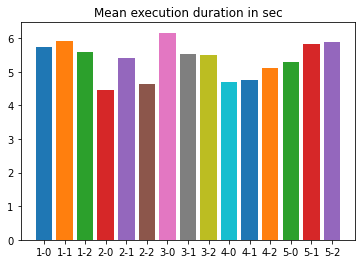

In [49]:
scenarios = dfr.scenario_id.unique()

plt.title("Mean execution duration in sec")

for scenario in scenarios:
    for trail in dfr.trail_id.unique():
        execution_start = dfr.loc[(dfr.trail_id == trail) & (dfr.scenario_id == scenario) & (dfr.command == "Execution") & (dfr.step == 1)].sort_values(by=['match_id'])
        execution_end   = dfr.loc[(dfr.trail_id == trail) & (dfr.scenario_id == scenario) & (dfr.command == "Execution") & (dfr.step == 2)].sort_values(by=['match_id'])

        durations = pd.to_timedelta(execution_end.time_stamp.values - execution_start.time_stamp.values)
        mean = durations.mean()
        std = durations.std()

        #plt.bar(f"scenario {scenario} {trail}", mean.total_seconds(), yerr=std.total_seconds(), capsize=10)
        plt.bar(f"{scenario}-{trail}", mean.total_seconds())


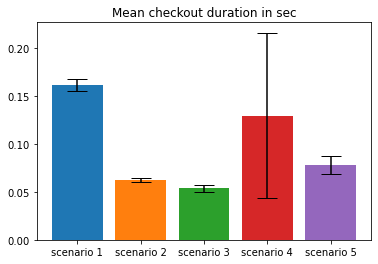

In [5]:
scenarios = dfr.scenario_id.unique()

plt.title("Mean checkout duration in sec")

for scenario in scenarios:
    execution_start = dfr.loc[(dfr.scenario_id == scenario) & (dfr.command == "Checkout") & (dfr.step == 1)].sort_values(by=['match_id'])
    execution_end   = dfr.loc[(dfr.scenario_id == scenario) & (dfr.command == "Checkout") & (dfr.step == 2)].sort_values(by=['match_id'])

    durations = pd.to_timedelta(execution_end.time_stamp.values - execution_start.time_stamp.values)
    mean = durations.mean()
    std = durations.std()

    plt.bar(f"scenario {scenario}", mean.total_seconds(), yerr=std.total_seconds(), capsize=10)
    


[2, 3, 4, 5]
scenario-2 tranfered=497025024 sum=18956.398224 mean=26219.38081943936
scenario-3 tranfered=497025024 sum=17797.114275 mean=27927.28171095592
scenario-4 tranfered=497025024 sum=18524.406059 mean=26830.82104856596
scenario-5 tranfered=497025024 sum=17730.131511 mean=28032.788346304107


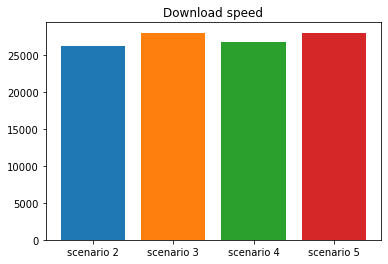

In [9]:
#scenarios = dft.scenario_id.unique()
scenarios = [2, 3, 4, 5]
print(scenarios)

plt.title("Download speed")

for scenario in scenarios:
    tranfer_start = dft.loc[(dft.scenario_id == scenario) & (dft.direction == "Download") & (dft.step == 1)].sort_values(by=['match_id'])
    tranfer_end   = dft.loc[(dft.scenario_id == scenario) & (dft.direction == "Download") & (dft.step == 2)].sort_values(by=['match_id'])
    tranfered     = dft.loc[(dft.scenario_id == scenario) & (dft.direction == "Download")].bytes_transferred.sum()
    
    durations = pd.to_timedelta(tranfer_end.time_stamp.values - tranfer_start.time_stamp.values)
    mean = tranfered / durations.sum().total_seconds()

    print(f"scenario-{scenario} tranfered={tranfered} sum={durations.sum().total_seconds()} mean={mean}")

    plt.bar(f"scenario {scenario}", mean)
        

[2, 3, 4, 5]
scenario-2 tranfered=1359000 sum=5.863515 mean=231772.23900680736
scenario-3 tranfered=1405408 sum=2.068868 mean=679312.5515982653
scenario-4 tranfered=1477001 sum=2.178606 mean=677956.91373291
scenario-5 tranfered=1534252 sum=2.1903 mean=700475.7339177281


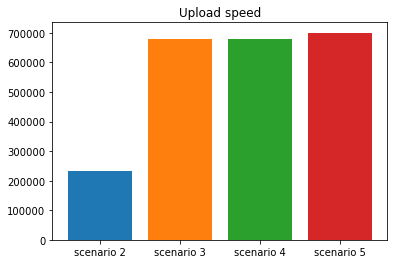

In [33]:
#scenarios = dft.scenario_id.unique()
scenarios = [2, 3, 4, 5]
print(scenarios)

plt.title("Upload speed")

for scenario in scenarios:
    tranfer_start = dft.loc[(dft.scenario_id == scenario) & (dft.direction == "Upload") & (dft.step == 1)].sort_values(by=['match_id'])
    tranfer_end   = dft.loc[(dft.scenario_id == scenario) & (dft.direction == "Upload") & (dft.step == 2)].sort_values(by=['match_id'])
    tranfered     = dft.loc[(dft.scenario_id == scenario) & (dft.direction == "Upload")].bytes_transferred.sum()
    
    durations = pd.to_timedelta(tranfer_end.time_stamp.values - tranfer_start.time_stamp.values)
    mean = tranfered / durations.sum().total_seconds()
    
    print(f"scenario-{scenario} tranfered={tranfered} sum={durations.sum().total_seconds()} mean={mean}")

    plt.bar(f"scenario {scenario}", mean)
        

scenario 1 Checkout 0.483973
scenario 2 Checkout 0.187302
scenario 3 Checkout 0.160591
scenario 4 Checkout 0.388285
scenario 5 Checkout 0.233808
scenario 1 Compile 24.246625
scenario 2 Compile 21.638265
scenario 3 Compile 15.958089
scenario 4 Compile 20.592868
scenario 5 Compile 19.575914
scenario 1 Execution 1345.790432
scenario 2 Execution 1129.785412
scenario 3 Execution 1339.631053
scenario 4 Execution 1135.025955
scenario 5 Execution 1325.290217
scenario 1 Upload 0.043932
scenario 2 Upload 5.863515
scenario 3 Upload 2.068868
scenario 4 Upload 2.178606
scenario 5 Upload 2.1903
scenario 1 Download 2.496876
scenario 2 Download 18956.398224
scenario 3 Download 17797.114275
scenario 4 Download 18524.406059
scenario 5 Download 17730.131511


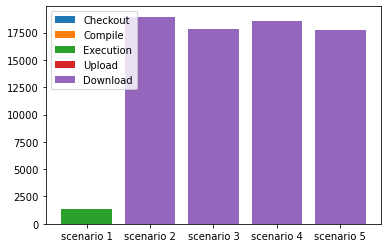

In [45]:
scenarios = dfr.scenario_id.unique()
#scenarios = [2, 3, 4, 5]

for command in dfr.command.unique():
    labels = []
    sums = []

    for scenario in scenarios:    
        exe_start     = dfr.loc[(dfr.scenario_id == scenario) & (dfr.command == command) & (dfr.step == 1)].sort_values(by=['match_id'])
        exe_end       = dfr.loc[(dfr.scenario_id == scenario) & (dfr.command == command) & (dfr.step == 2)].sort_values(by=['match_id'])
        exe_durations = pd.to_timedelta(exe_end.time_stamp.values - exe_start.time_stamp.values)
        su = exe_durations.sum().total_seconds()
        sums.append(su)
        labels.append(f"scenario {scenario}")
        print(f"scenario {scenario}", command, su)
    
    plt.bar(labels, sums, label=command)

for direction in dft.direction.unique():
    labels = []
    sums = []

    for scenario in scenarios:    
        dtranfer_start     = dft.loc[(dft.scenario_id == scenario) & (dft.direction == direction) & (dft.step == 1)].sort_values(by=['match_id'])
        dtranfer_end       = dft.loc[(dft.scenario_id == scenario) & (dft.direction == direction) & (dft.step == 2)].sort_values(by=['match_id'])
        dtranfer_durations = pd.to_timedelta(dtranfer_end.time_stamp.values - dtranfer_start.time_stamp.values)
        su = dtranfer_durations.sum().total_seconds()
        sums.append(su)
        labels.append(f"scenario {scenario}")
        print(f"scenario {scenario}", direction, su)

    plt.bar(labels, sums, label=direction)

plt.legend()
    